In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import os
import json
import ast

In [17]:
run_date_base = [
    'Apr-04-2022-2247-210',
    # 'Apr-03-2022-0023-30',
    # 'Apr-03-2022-0024-458',
    # 'Apr-02-2022-2257-850',
    # 'Apr-02-2022-2224-39',
]
dat_names_base = [
    'base_c10_n1',
    # 'base_c100/n0.1',
    # 'base_c100/n0',
    # 'base_c10000/n0',
    # 'base_c1/n0.5',
]

result_path_base = '/home/qiaoyuet/project/538l_project/results'

In [18]:
run_date_local = [
    'Apr-04-2022-2335-635',
    # 'Apr-04-2022-2146-321',
    # 'Apr-04-2022-2146-321',
    # 'Apr-02-2022-1624-37',
]
dat_names_local = [
    'prune_c10/n1_1',
    # 'prune_c10/n1_2',
    # 'prune_c10/n1',
    # 'prune_c1/n0.5',
]

result_path_local = '/home/qiaoyuet/project/538l_project/results'

In [19]:
tmp_dat = []
tmp_dat_test = []
for i in range(len(run_date_base)):
    # train
    train_log_path = os.path.join(result_path_base, run_date_base[i], 'train_log.txt')
    train_log = pd.read_csv(train_log_path, header=None, sep='|', names=[
        'epoch', 'batch', 'acc', 'eps', 'avg_sparcity', 
        'clip',
        'mean_gradients_size', 'mean_gradients_size_clipped', 'grads_norm_noised',
        'grads_norm_per_layer_dict', 'grads_norm_clipped_per_layer_dict', 'grads_norm_noised_per_layer_dict'
    ], index_col=False)
    train_log['idx'] = train_log.index
    train_log['label'] = [dat_names_base[i]] * train_log.shape[0]
    # decode dict info
    tmp_names = list(ast.literal_eval(train_log['grads_norm_per_layer_dict'].iloc[0][1:-1]).keys())
    grads_norm_per_layer_df = pd.DataFrame(columns=tmp_names)
    grads_norm_clipped_per_layer_df = pd.DataFrame(columns=tmp_names)
    grads_norm_noised_per_layer_df = pd.DataFrame(columns=tmp_names)
    for idx in range(train_log.shape[0]):
        tmp_string1 = train_log['grads_norm_per_layer_dict'].iloc[idx][1:-1]
        tmp_string2 = train_log['grads_norm_clipped_per_layer_dict'].iloc[idx][1:-1]
        tmp_string3 = train_log['grads_norm_noised_per_layer_dict'].iloc[idx][1:]
        tmp_row1 = ast.literal_eval(tmp_string1)
        tmp_row2 = ast.literal_eval(tmp_string2)
        tmp_row3 = ast.literal_eval(tmp_string3)
        grads_norm_per_layer_df.loc[idx] = tmp_row1
        grads_norm_clipped_per_layer_df.loc[idx] = tmp_row2
        grads_norm_noised_per_layer_df.loc[idx] = tmp_row3
    grads_norm_per_layer_df.columns = ['orig_'+i for i in tmp_names]
    grads_norm_clipped_per_layer_df.columns = ['clip_'+i for i in tmp_names]
    grads_norm_noised_per_layer_df.columns = ['noise_'+i for i in tmp_names]
    train_log2 = pd.concat(
        [train_log, grads_norm_per_layer_df, grads_norm_clipped_per_layer_df, grads_norm_noised_per_layer_df],
        axis=1)
    tmp_dat.append(train_log2)
    # test
    test_log_path = os.path.join(result_path_base, run_date_base[i], 'test_log.txt')
    test_log = pd.read_csv(test_log_path, header=None, sep='_', names=[
        'train_epoch', 'test_acc', 'train_eps'
    ], index_col=False)
    test_log['idx'] = test_log.index
    test_log['label'] = [dat_names_base[i]] * test_log.shape[0]
    tmp_dat_test.append(test_log)
dat_base = pd.concat(tmp_dat, axis=0)
dat_base_test = pd.concat(tmp_dat_test, axis=0)

In [21]:
tmp_dat = []
tmp_dat_test = []
for i in range(len(run_date_local)):
    # train
    train_log_path = os.path.join(result_path_local, run_date_local[i], 'train_log.txt')
    train_log = pd.read_csv(train_log_path, header=None, sep='|', names=[
        'epoch', 'batch', 'acc', 'eps', 'avg_sparcity', 
        'clip',
        'mean_gradients_size', 'mean_gradients_size_clipped', 'grads_norm_noised',
        'grads_norm_per_layer_dict', 'grads_norm_clipped_per_layer_dict', 'grads_norm_noised_per_layer_dict'
    ], index_col=False)
    train_log['idx'] = train_log.index
    train_log['label'] = [dat_names_local[i]] * train_log.shape[0]
    # decode dict info
    tmp_names = list(ast.literal_eval(train_log['grads_norm_per_layer_dict'].iloc[0][1:-1]).keys())
    grads_norm_per_layer_df = pd.DataFrame(columns=tmp_names)
    grads_norm_clipped_per_layer_df = pd.DataFrame(columns=tmp_names)
    grads_norm_noised_per_layer_df = pd.DataFrame(columns=tmp_names)
    for idx in range(train_log.shape[0]):
        tmp_string1 = train_log['grads_norm_per_layer_dict'].iloc[idx][1:-1]
        tmp_string2 = train_log['grads_norm_clipped_per_layer_dict'].iloc[idx][1:-1]
        tmp_string3 = train_log['grads_norm_noised_per_layer_dict'].iloc[idx][1:]
        tmp_row1 = ast.literal_eval(tmp_string1)
        tmp_row2 = ast.literal_eval(tmp_string2)
        tmp_row3 = ast.literal_eval(tmp_string3)
        grads_norm_per_layer_df.loc[idx] = tmp_row1
        grads_norm_clipped_per_layer_df.loc[idx] = tmp_row2
        grads_norm_noised_per_layer_df.loc[idx] = tmp_row3
    grads_norm_per_layer_df.columns = ['orig_'+i for i in tmp_names]
    grads_norm_clipped_per_layer_df.columns = ['clip_'+i for i in tmp_names]
    grads_norm_noised_per_layer_df.columns = ['noise_'+i for i in tmp_names]
    train_log2 = pd.concat(
        [train_log, grads_norm_per_layer_df, grads_norm_clipped_per_layer_df, grads_norm_noised_per_layer_df],
        axis=1)
    tmp_dat.append(train_log2)
    # test
    test_log_path = os.path.join(result_path_local, run_date_local[i], 'test_log.txt')
    test_log = pd.read_csv(test_log_path, header=None, sep='_', names=[
        'train_epoch', 'test_acc', 'train_eps'
    ], index_col=False)
    test_log['idx'] = test_log.index
    test_log['label'] = [dat_names_local[i]] * test_log.shape[0]
    tmp_dat_test.append(test_log)
dat_local = pd.concat(tmp_dat, axis=0)
dat_local_test = pd.concat(tmp_dat_test, axis=0)

In [22]:
dat = pd.concat([dat_base, dat_local], axis=0)
dat_test = pd.concat([dat_base_test, dat_local_test], axis=0)
dat_names = dat_names_base + dat_names_local

In [23]:
tmp_names

['res_net9/~/block_1/~/b_0',
 'res_net9/~/block_1/~/b_1',
 'res_net9/~/block_1/~/b_end',
 'res_net9/~/block_1/~/b_relu',
 'res_net9/~/block_1/~/conv_0',
 'res_net9/~/block_1/~/conv_1',
 'res_net9/~/block_1/~/scale',
 'res_net9/~/block_2/~/b_0',
 'res_net9/~/block_2/~/b_1',
 'res_net9/~/block_2/~/b_end',
 'res_net9/~/block_2/~/b_relu',
 'res_net9/~/block_2/~/conv_0',
 'res_net9/~/block_2/~/conv_1',
 'res_net9/~/block_2/~/scale',
 'res_net9/~/conv_block_1/~/b_end',
 'res_net9/~/conv_block_1/~/b_in',
 'res_net9/~/conv_block_1/~/conv',
 'res_net9/~/conv_block_1/~/scale',
 'res_net9/~/conv_block_2/~/b_end',
 'res_net9/~/conv_block_2/~/b_in',
 'res_net9/~/conv_block_2/~/conv',
 'res_net9/~/conv_block_2/~/scale',
 'res_net9/~/conv_block_3/~/b_end',
 'res_net9/~/conv_block_3/~/b_in',
 'res_net9/~/conv_block_3/~/conv',
 'res_net9/~/conv_block_3/~/scale',
 'res_net9/~/initial_conv',
 'res_net9/~/logits']

In [24]:
[i for i in tmp_names if 'conv' in i.split('/')[-1]]

['res_net9/~/block_1/~/conv_0',
 'res_net9/~/block_1/~/conv_1',
 'res_net9/~/block_2/~/conv_0',
 'res_net9/~/block_2/~/conv_1',
 'res_net9/~/conv_block_1/~/conv',
 'res_net9/~/conv_block_2/~/conv',
 'res_net9/~/conv_block_3/~/conv',
 'res_net9/~/initial_conv']

In [31]:
dat['label'].unique()

array(['base_c10_n1', 'prune_c10/n1_1'], dtype=object)

In [41]:
pd.set_option('display.max_rows', 500)
dat[dat['label']=='prune_c10/n1_1'][['epoch', 'avg_sparcity']].drop_duplicates()

,epoch,avg_sparcity
0,0.0,-1.000
97,1.0,-1.000
194,2.0,-1.000
291,3.0,-1.000
388,4.0,-1.000
485,5.0,0.200
582,6.0,-1.000
679,7.0,-1.000
776,8.0,0.243
873,9.0,-1.000


### Plots

eps vs acc


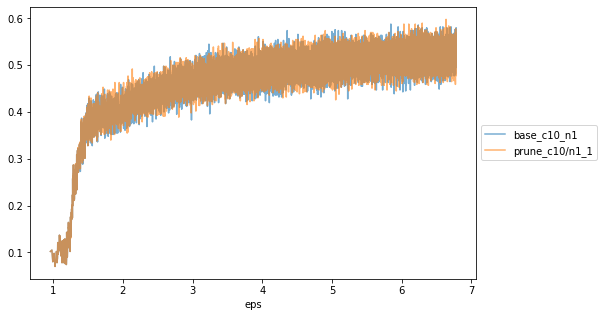

In [25]:
print('eps vs acc')
fig, ax = plt.subplots()
for label, df in dat.groupby('label'):
    df.plot(kind='line', x='eps',y='acc', ax=ax, label=label, alpha=0.6)
# plt.legend()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.close()

In [26]:
# print('test eps vs acc')
# dat_test_agg = []
# for tmp_label in dat_test['label'].unique():
#     tmp_dat = dat_test[dat_test['label']==tmp_label]
#     tmp_dat = tmp_dat.groupby(['label', 'train_epoch', 'train_batch']).apply(lambda x: x.iloc[[-1]]).reset_index(drop=True)
#     dat_test_agg.append(tmp_dat)
# dat_test_agg = pd.concat(dat_test_agg)

# fig, ax = plt.subplots()
# for label, df in dat_test_agg.groupby('label'):
#     # df.plot(kind='line', x='idx',y='test_acc', ax=ax, label=label, alpha=0.6)
#     df.plot(kind='line', x='train_eps',y='test_acc', ax=ax, label=label, alpha=0.6)
# # plt.legend()
# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()
# plt.close()

acc


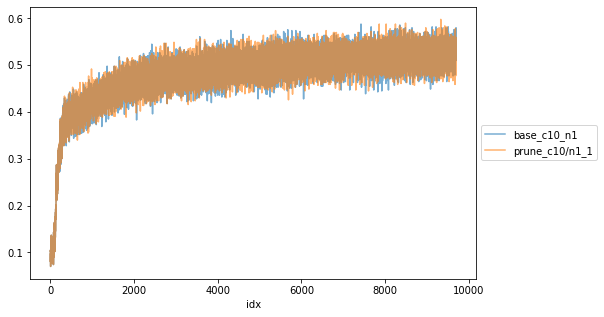

eps


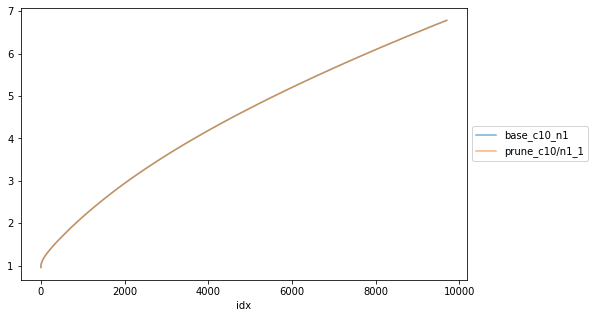

avg_sparcity


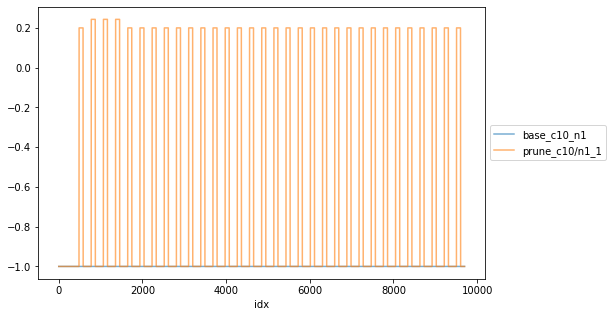

mean_gradients_size


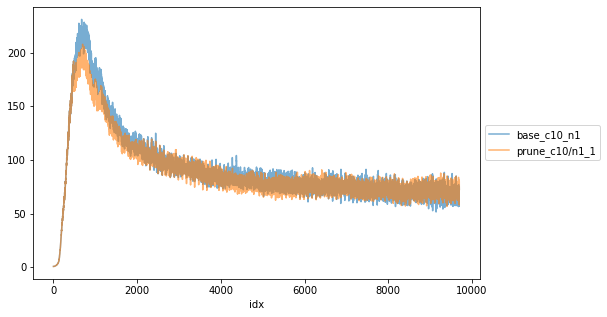

mean_gradients_size_clipped


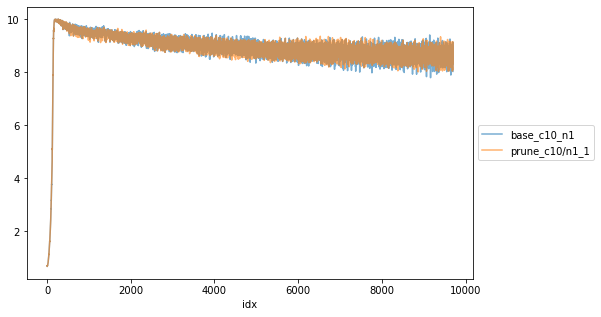

grads_norm_noised


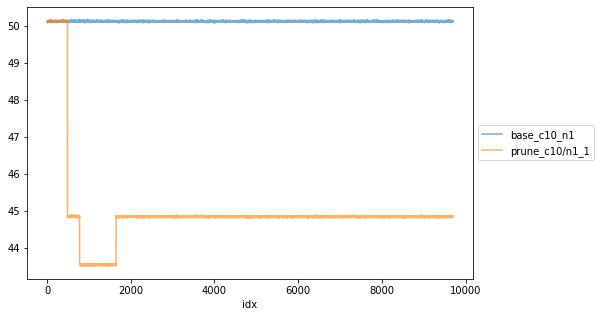

orig_res_net9/~/block_1/~/b_0


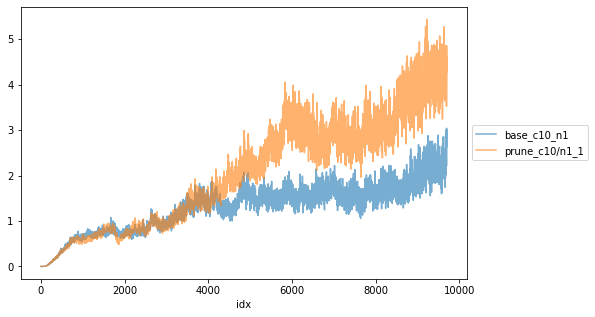

orig_res_net9/~/block_1/~/b_1


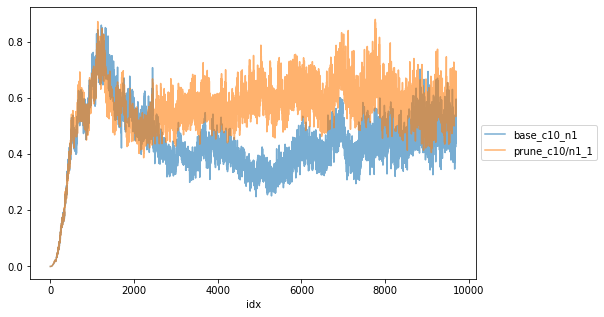

orig_res_net9/~/block_1/~/b_end


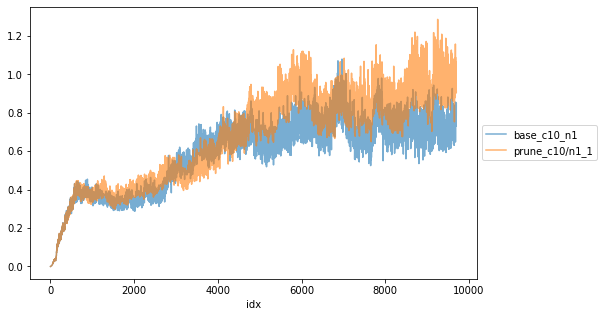

orig_res_net9/~/block_1/~/b_relu


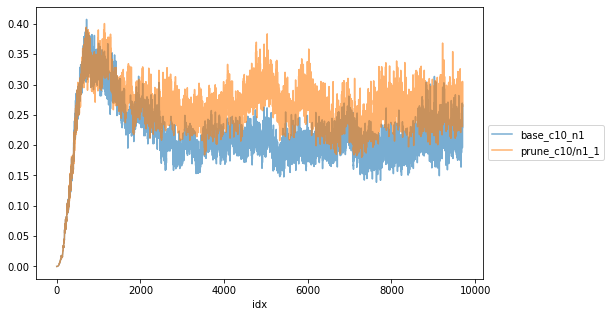

orig_res_net9/~/block_1/~/conv_0


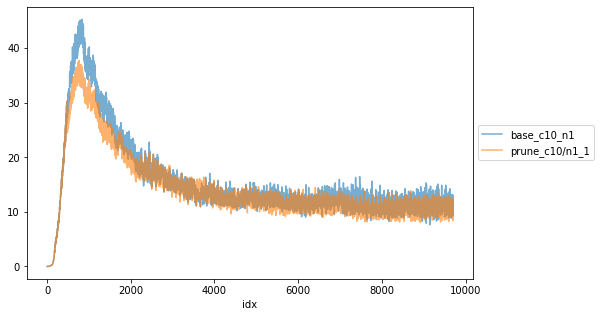

orig_res_net9/~/block_1/~/conv_1


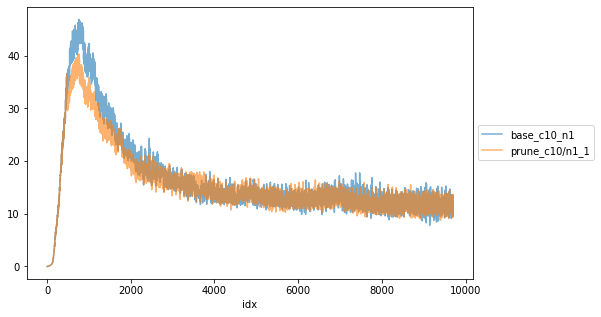

orig_res_net9/~/block_1/~/scale


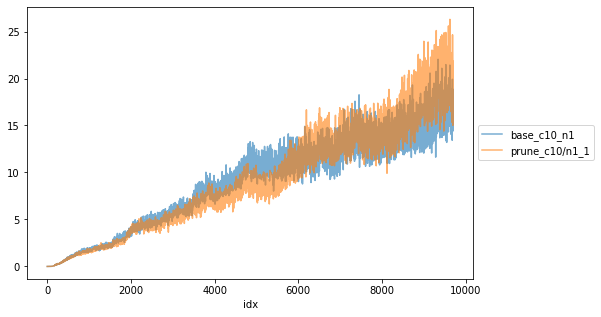

orig_res_net9/~/block_2/~/b_0


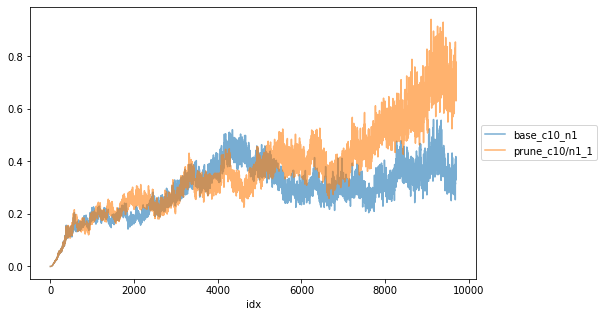

orig_res_net9/~/block_2/~/b_1


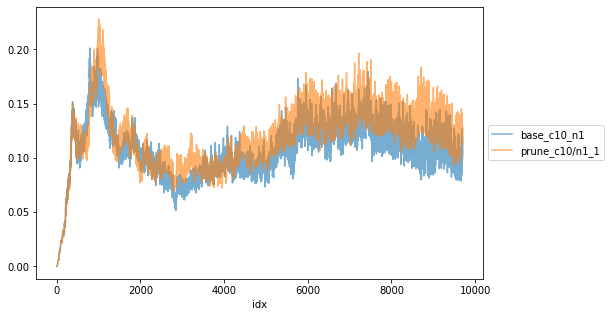

orig_res_net9/~/block_2/~/b_end


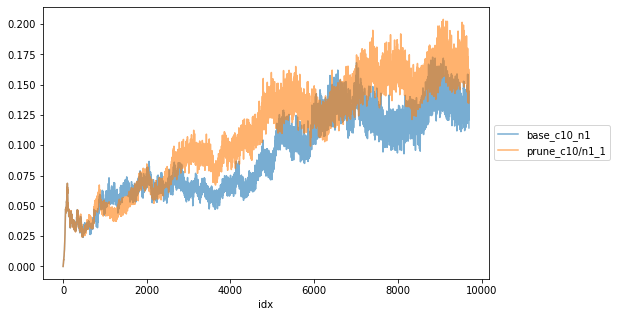

orig_res_net9/~/block_2/~/b_relu


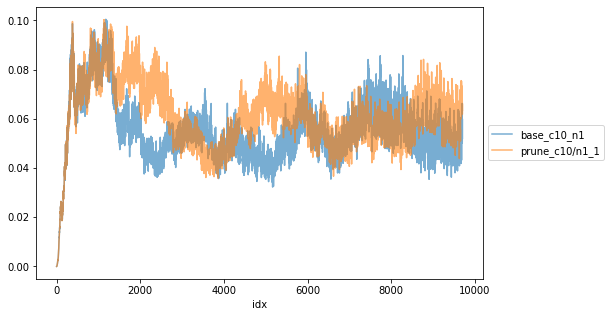

orig_res_net9/~/block_2/~/conv_0


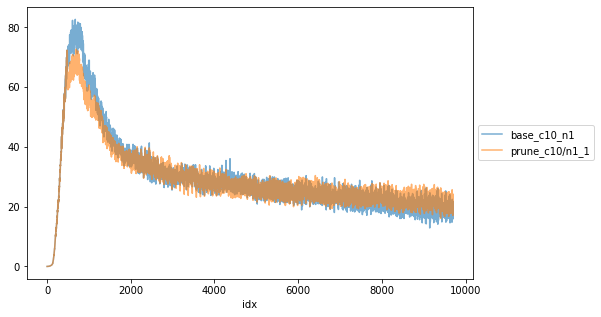

orig_res_net9/~/block_2/~/conv_1


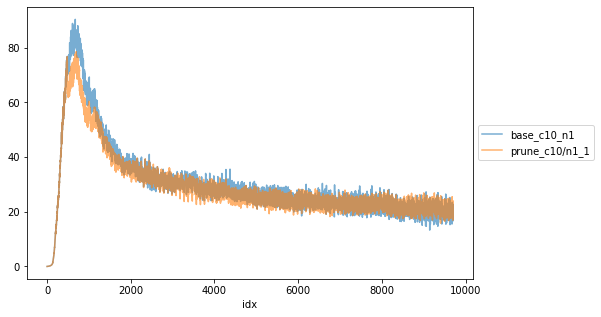

orig_res_net9/~/block_2/~/scale


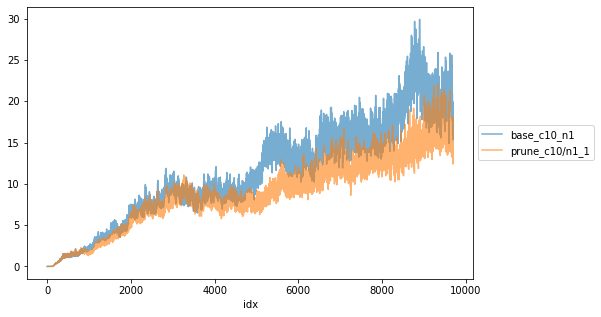

orig_res_net9/~/conv_block_1/~/b_end


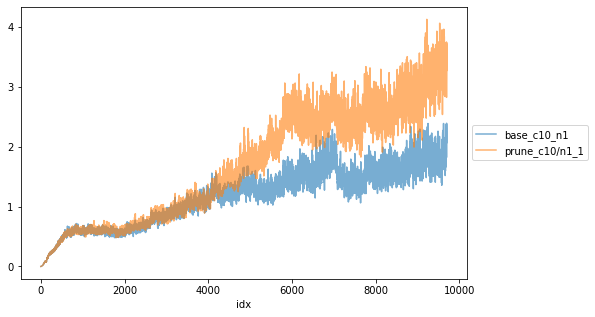

orig_res_net9/~/conv_block_1/~/b_in


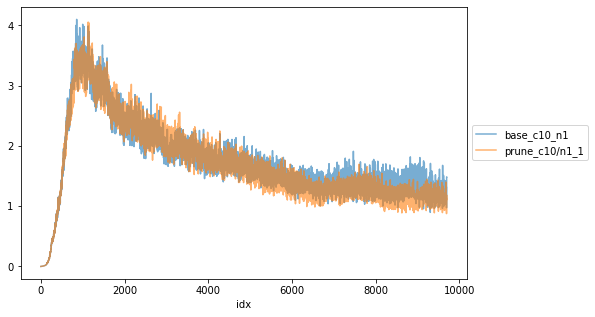

orig_res_net9/~/conv_block_1/~/conv


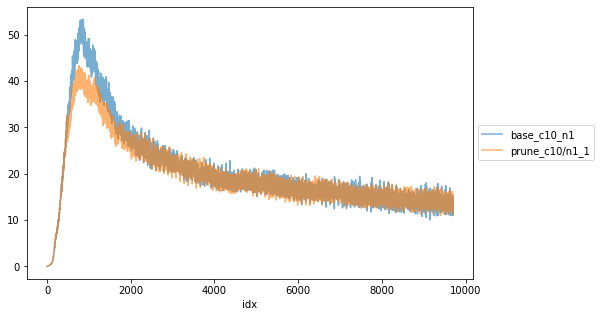

orig_res_net9/~/conv_block_1/~/scale


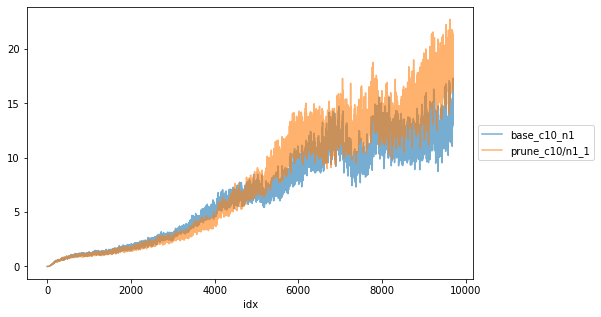

orig_res_net9/~/conv_block_2/~/b_end


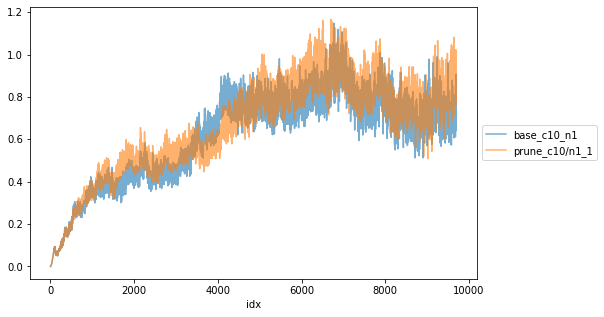

orig_res_net9/~/conv_block_2/~/b_in


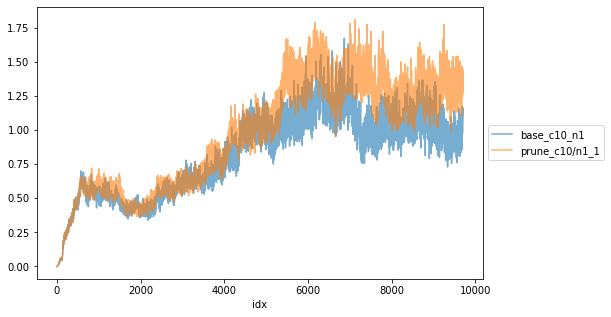

orig_res_net9/~/conv_block_2/~/conv


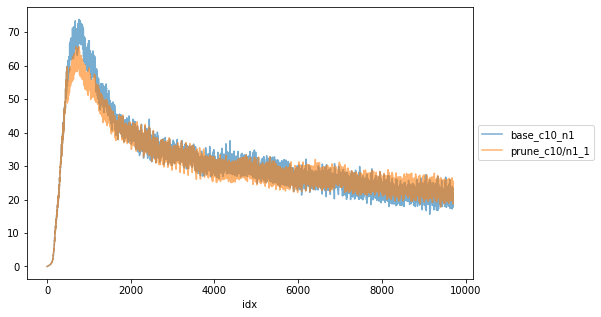

orig_res_net9/~/conv_block_2/~/scale


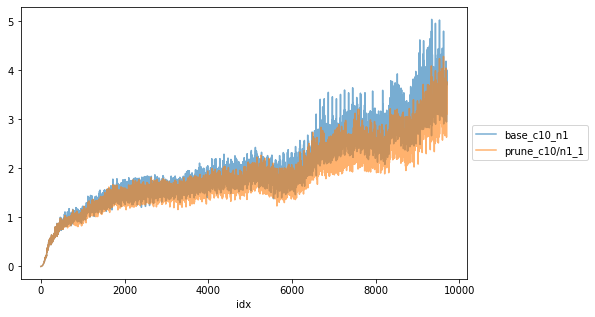

orig_res_net9/~/conv_block_3/~/b_end


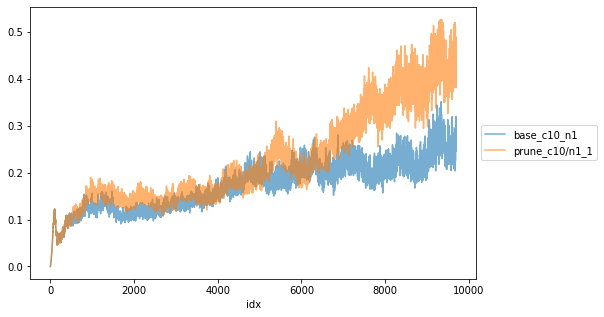

orig_res_net9/~/conv_block_3/~/b_in


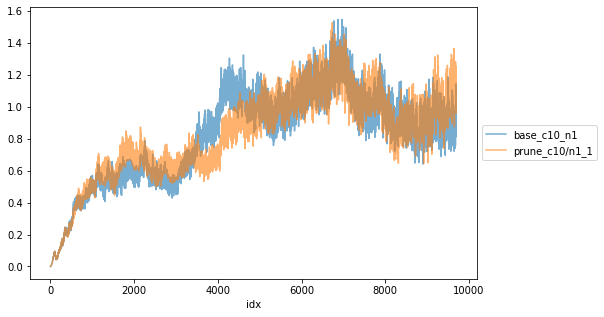

orig_res_net9/~/conv_block_3/~/conv


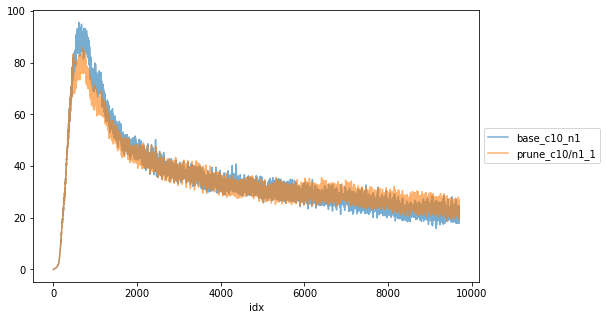

orig_res_net9/~/conv_block_3/~/scale


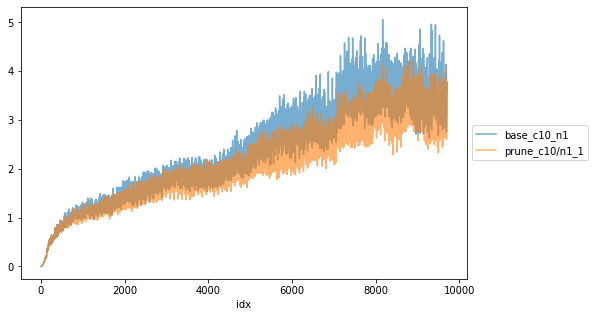

orig_res_net9/~/initial_conv


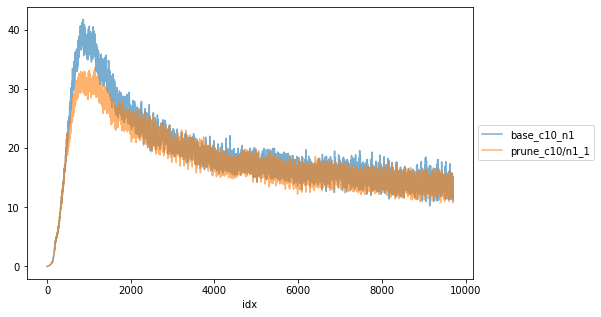

clip_res_net9/~/block_1/~/b_0


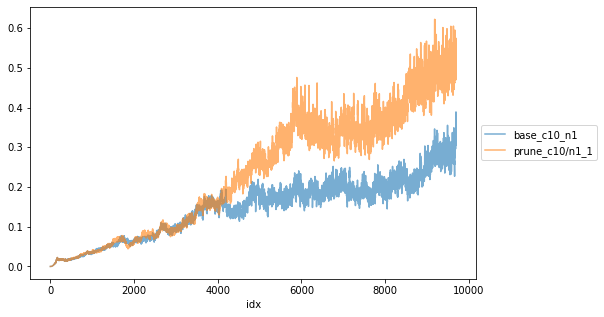

clip_res_net9/~/block_1/~/b_1


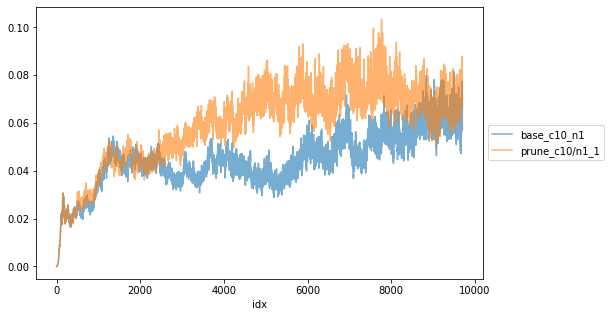

clip_res_net9/~/block_1/~/b_end


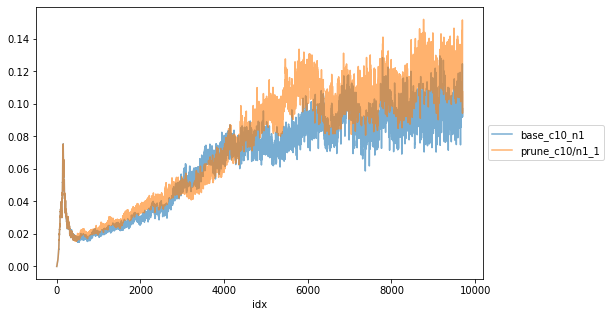

clip_res_net9/~/block_1/~/b_relu


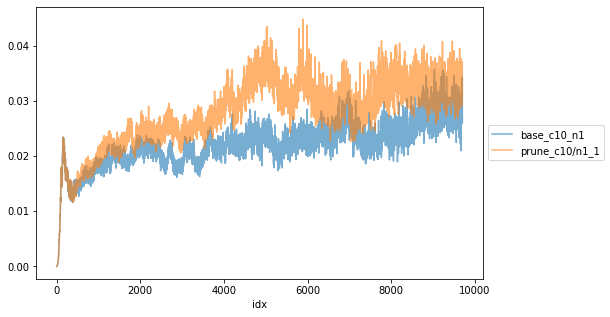

clip_res_net9/~/block_1/~/conv_0


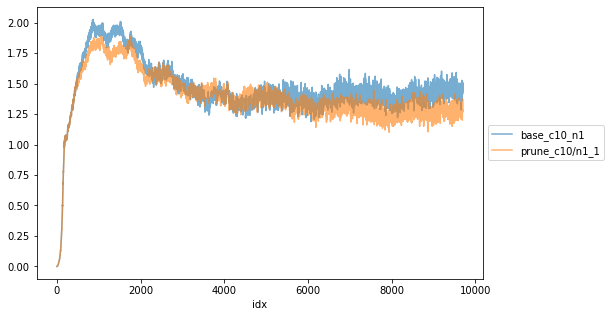

clip_res_net9/~/block_1/~/conv_1


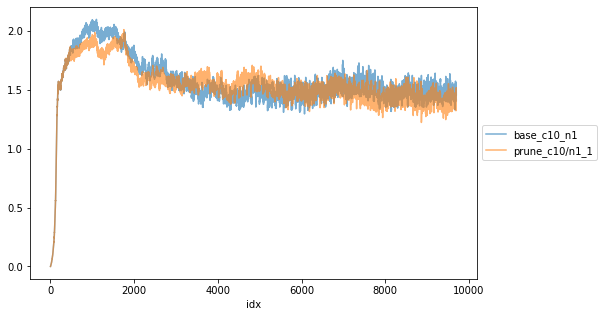

clip_res_net9/~/block_1/~/scale


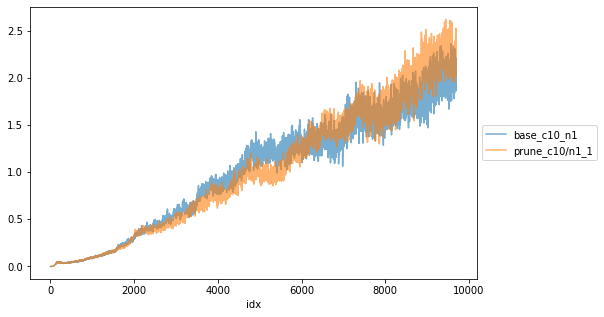

clip_res_net9/~/block_2/~/b_0


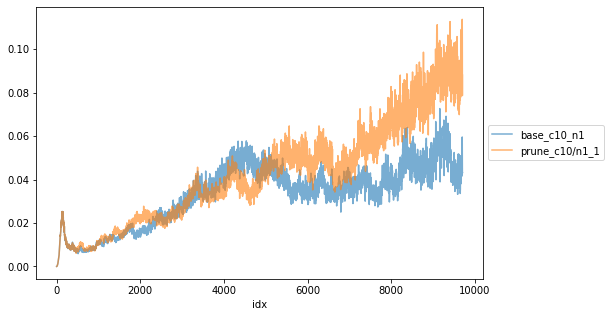

clip_res_net9/~/block_2/~/b_1


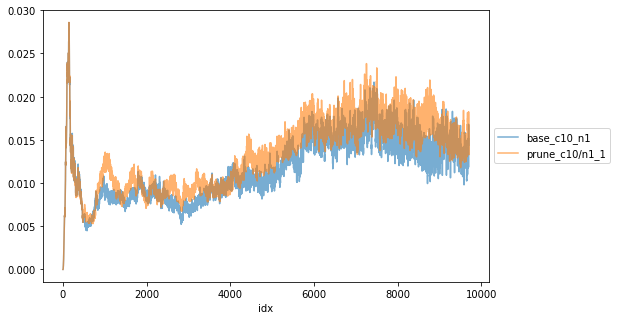

clip_res_net9/~/block_2/~/b_end


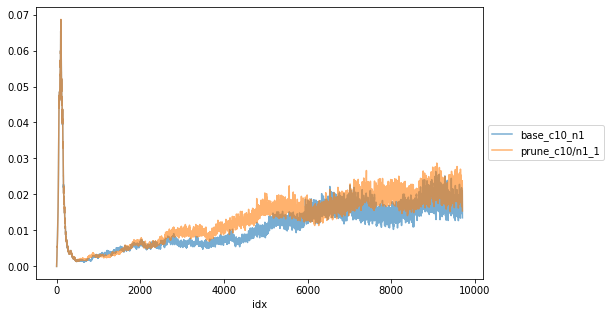

clip_res_net9/~/block_2/~/b_relu


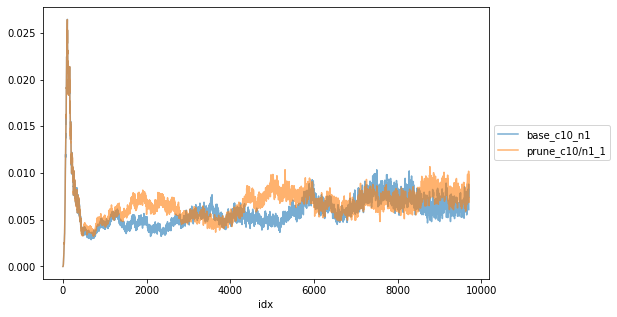

clip_res_net9/~/block_2/~/conv_0


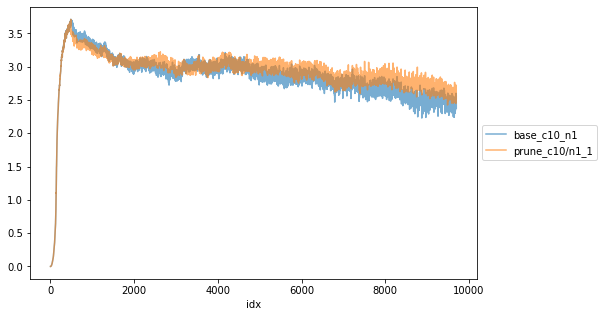

clip_res_net9/~/block_2/~/conv_1


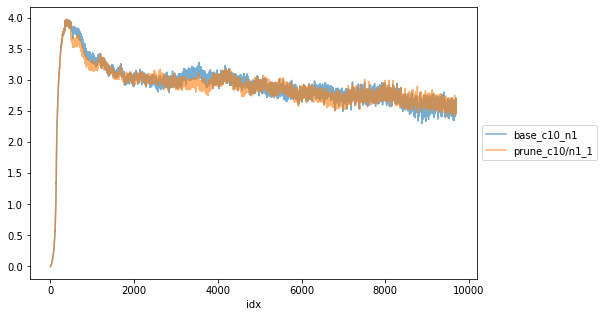

clip_res_net9/~/block_2/~/scale


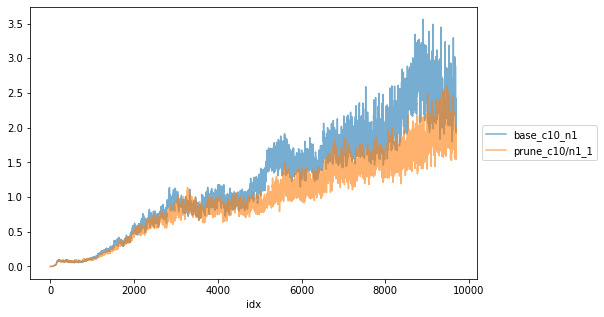

clip_res_net9/~/conv_block_1/~/b_end


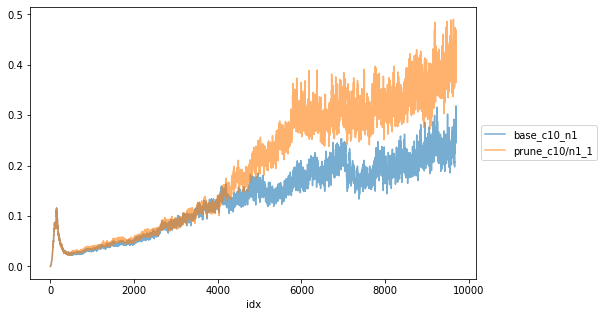

clip_res_net9/~/conv_block_1/~/b_in


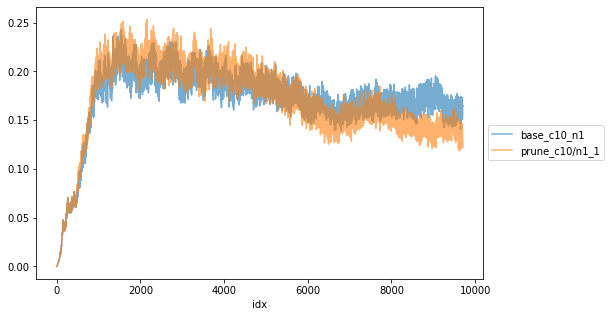

clip_res_net9/~/conv_block_1/~/conv


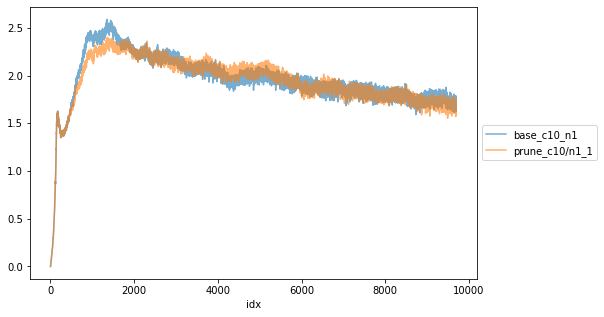

clip_res_net9/~/conv_block_1/~/scale


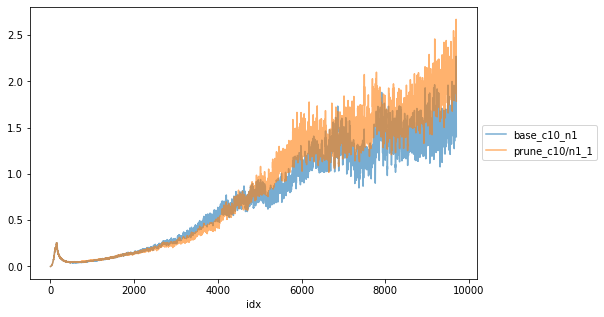

clip_res_net9/~/conv_block_2/~/b_end


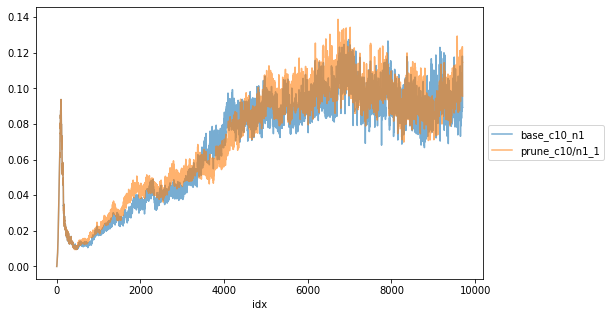

clip_res_net9/~/conv_block_2/~/b_in


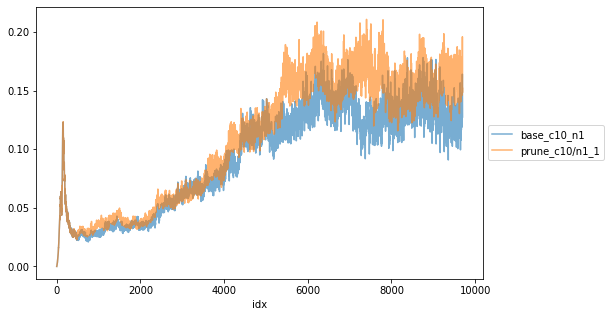

clip_res_net9/~/conv_block_2/~/conv


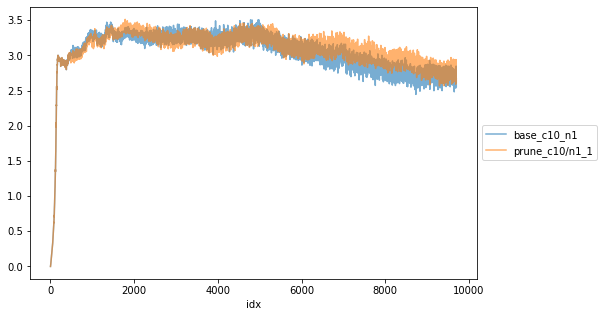

clip_res_net9/~/conv_block_2/~/scale


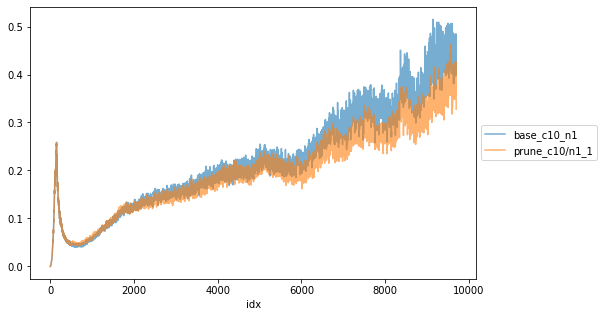

clip_res_net9/~/conv_block_3/~/b_end


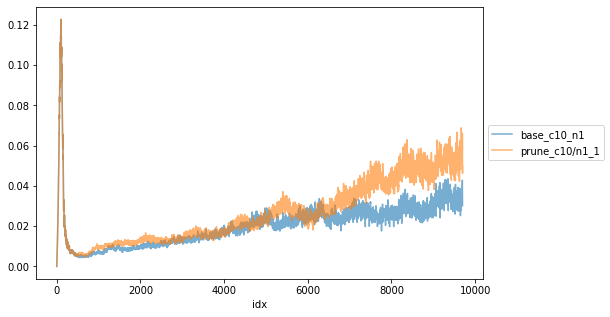

clip_res_net9/~/conv_block_3/~/b_in


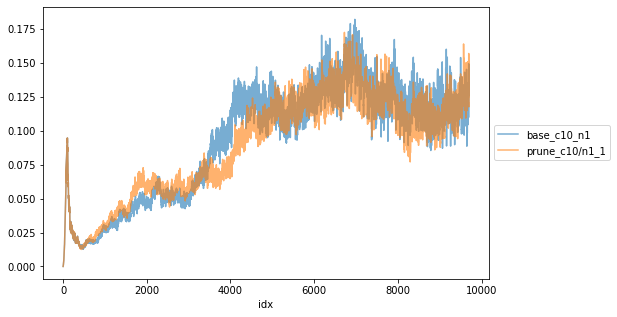

clip_res_net9/~/conv_block_3/~/conv


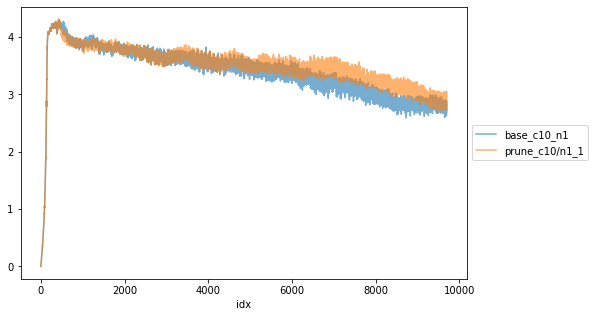

clip_res_net9/~/conv_block_3/~/scale


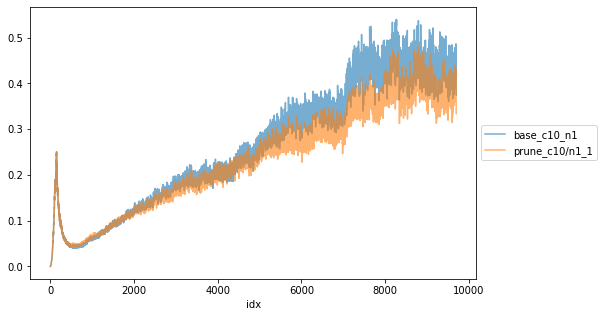

clip_res_net9/~/initial_conv


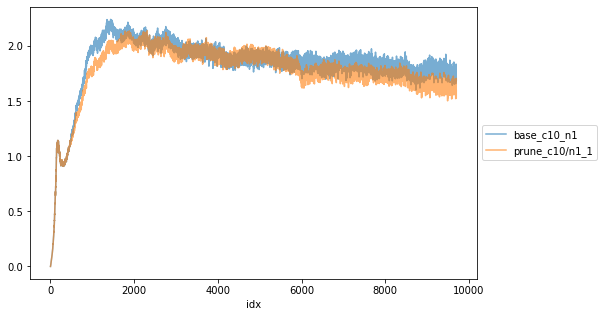

noise_res_net9/~/block_1/~/b_0


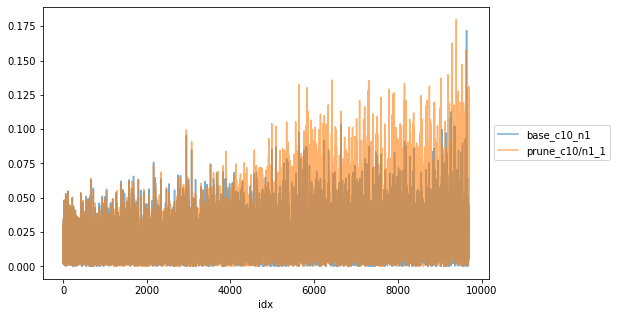

noise_res_net9/~/block_1/~/b_1


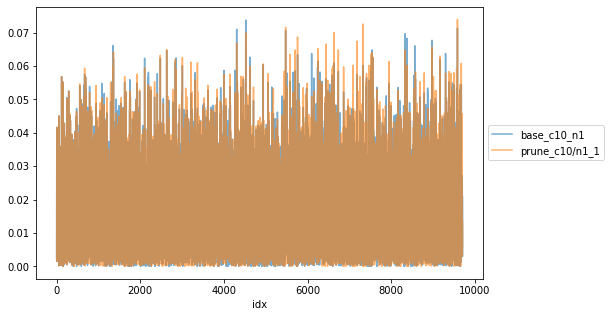

noise_res_net9/~/block_1/~/b_end


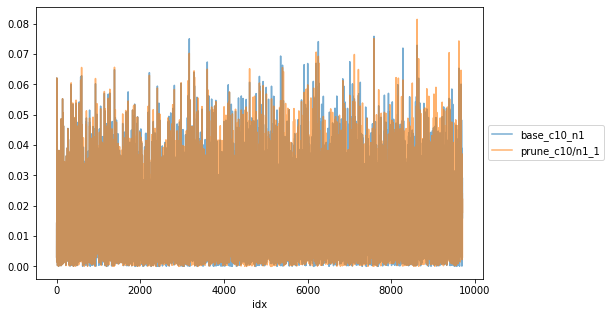

noise_res_net9/~/block_1/~/b_relu


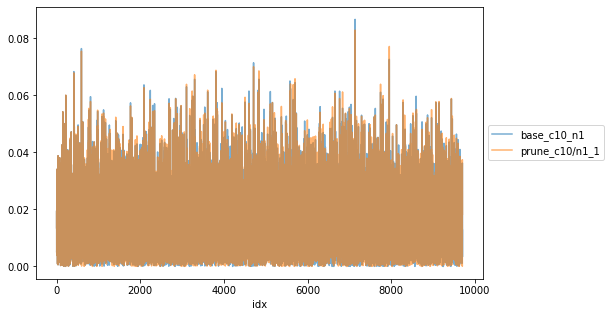

noise_res_net9/~/block_1/~/conv_0


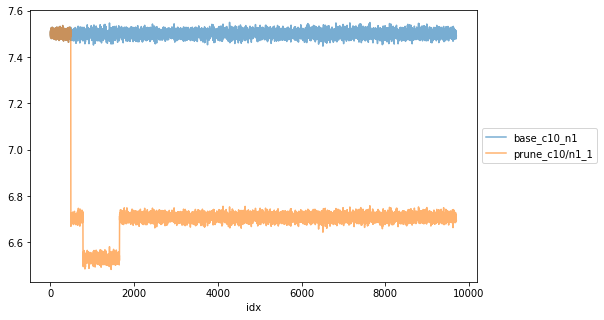

noise_res_net9/~/block_1/~/conv_1


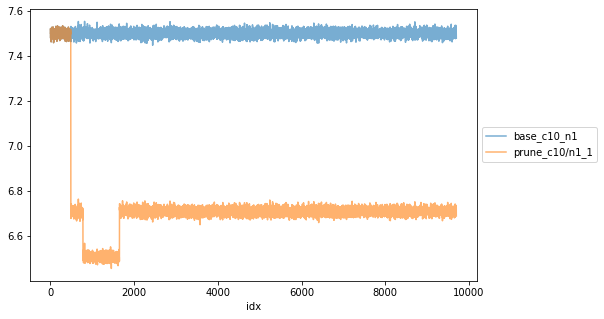

noise_res_net9/~/block_1/~/scale


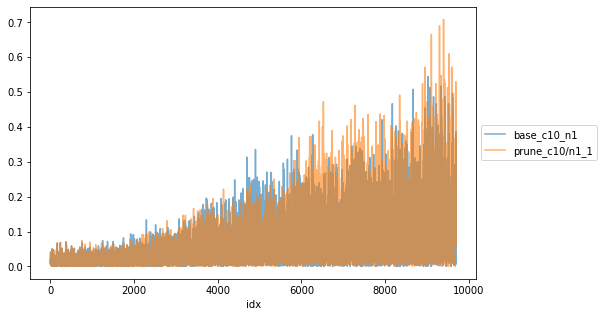

noise_res_net9/~/block_2/~/b_0


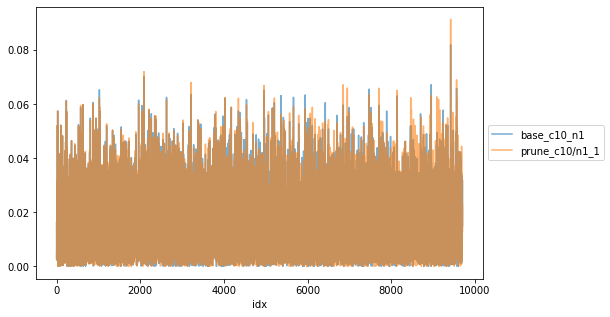

noise_res_net9/~/block_2/~/b_1


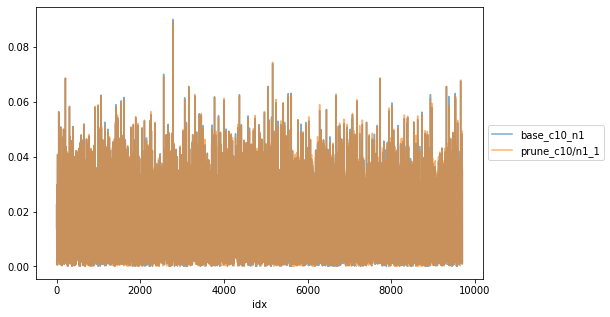

noise_res_net9/~/block_2/~/b_end


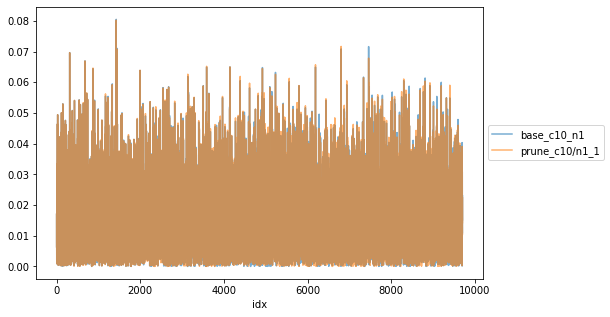

noise_res_net9/~/block_2/~/b_relu


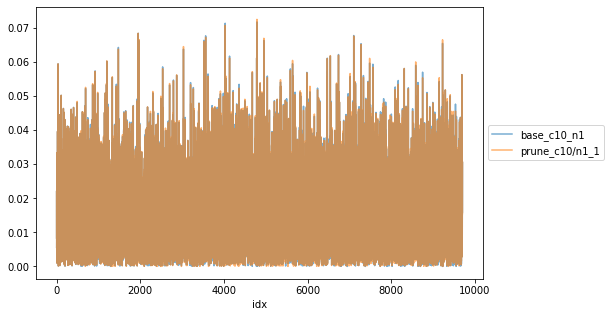

noise_res_net9/~/block_2/~/conv_0


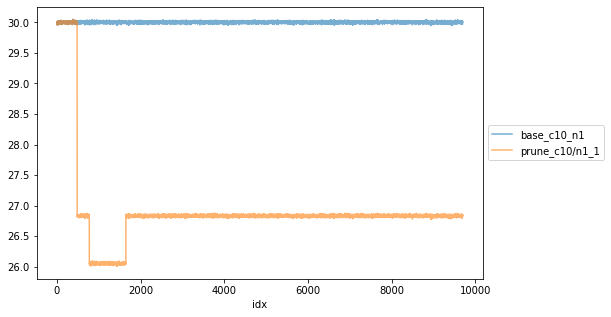

noise_res_net9/~/block_2/~/conv_1


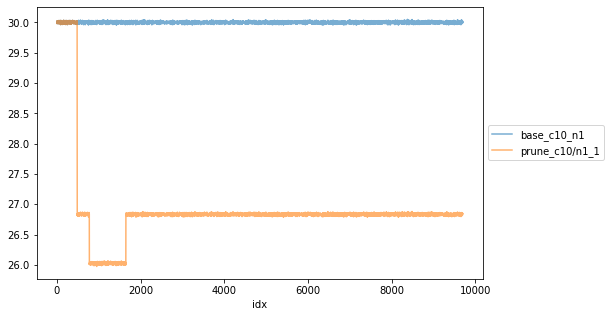

noise_res_net9/~/block_2/~/scale


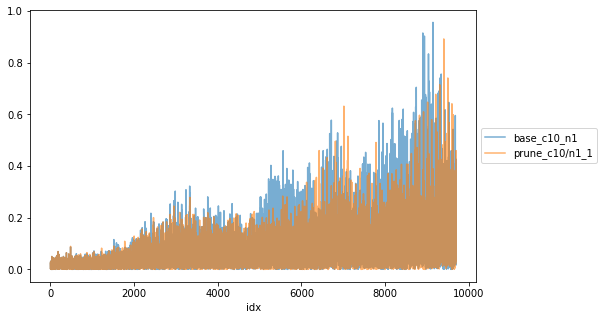

noise_res_net9/~/conv_block_1/~/b_end


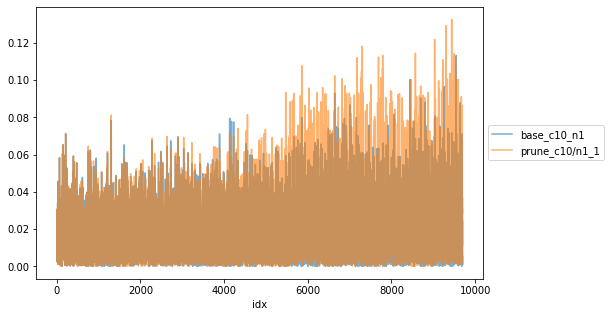

noise_res_net9/~/conv_block_1/~/b_in


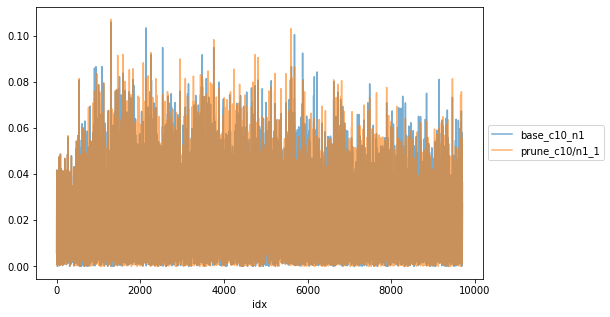

noise_res_net9/~/conv_block_1/~/conv


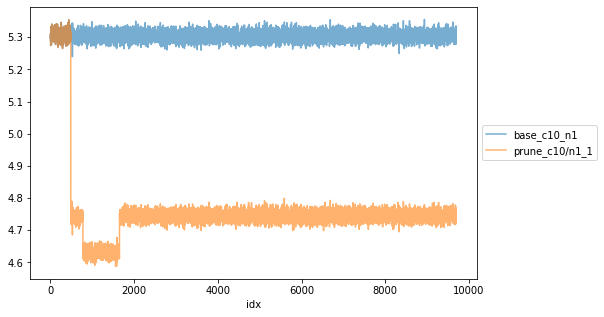

noise_res_net9/~/conv_block_1/~/scale


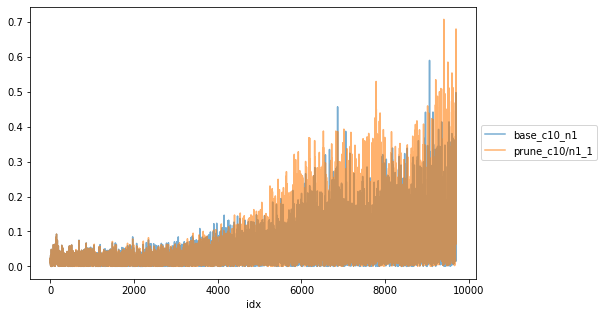

noise_res_net9/~/conv_block_2/~/b_end


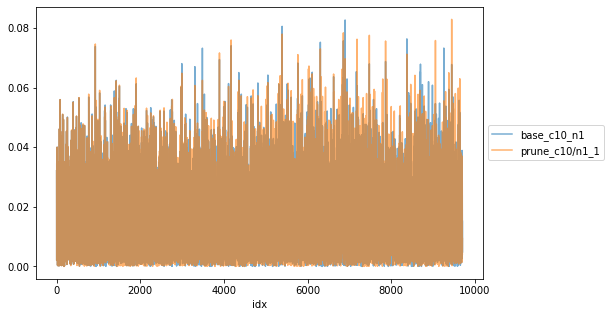

noise_res_net9/~/conv_block_2/~/b_in


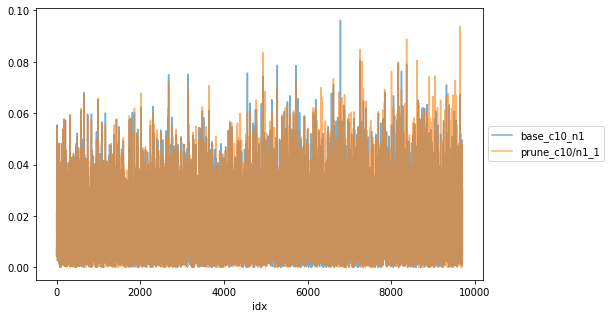

noise_res_net9/~/conv_block_2/~/conv


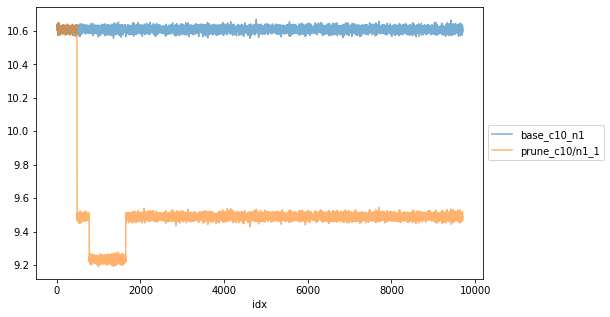

noise_res_net9/~/conv_block_2/~/scale


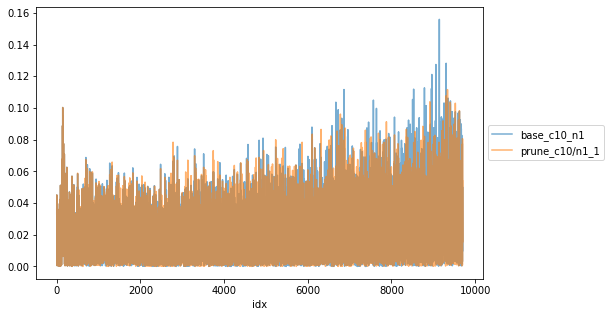

noise_res_net9/~/conv_block_3/~/b_end


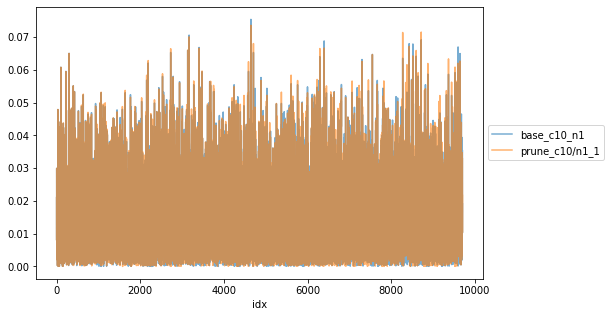

noise_res_net9/~/conv_block_3/~/b_in


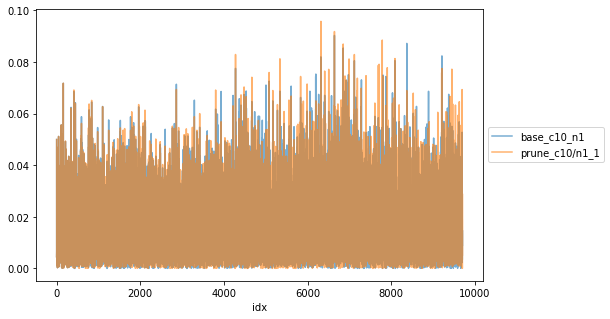

noise_res_net9/~/conv_block_3/~/conv


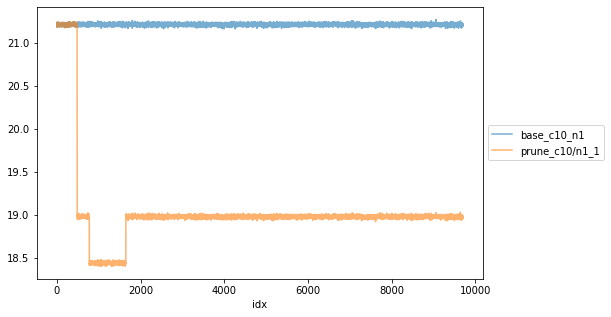

noise_res_net9/~/conv_block_3/~/scale


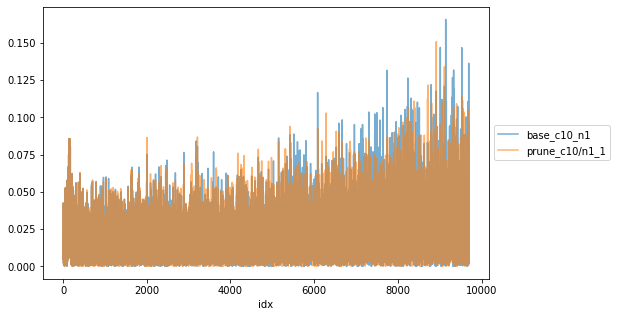

noise_res_net9/~/initial_conv


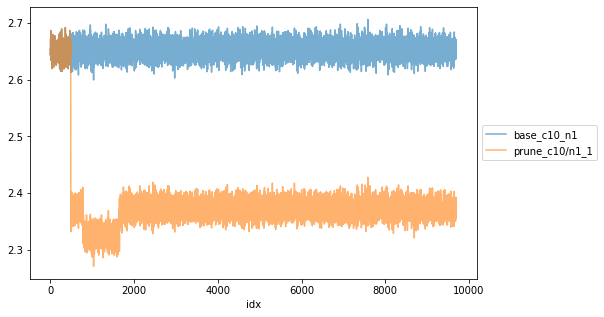

In [27]:
plt_cols = [
    'acc', 'eps', 'avg_sparcity', 
    'mean_gradients_size', 'mean_gradients_size_clipped', 'grads_norm_noised',
]

# plt_cols += ['orig_'+i for i in tmp_names if 'conv' in i.split('/')[-1]]
plt_cols += ['orig_'+i for i in tmp_names[:-1]]
plt_cols += ['clip_'+i for i in tmp_names[:-1]]
plt_cols += ['noise_'+i for i in tmp_names[:-1]]

for col in plt_cols:
    print(col)
    fig, ax = plt.subplots()
    for label, df in dat.groupby('label'):
        df.plot(kind='line', x='idx',y=col, ax=ax, label=label, alpha=0.6)
    # plt.legend()
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

### Analysis

In [34]:
np.random.seed(1024)

In [35]:
pseudo_grad_vec = np.concatenate([np.random.normal(0, 1, size=100), np.random.normal(0, 20, size=10)])
np.random.shuffle(pseudo_grad_vec)
pseudo_grad_norm = np.sqrt(np.sum(np.square(pseudo_grad_vec)))
pseudo_clip = 10
pseudo_noise_multiplier = 1
pseudo_grad_vec_clipped = pseudo_grad_vec / max(1, (pseudo_grad_norm/pseudo_clip))
generated_noise = np.random.normal(0, pseudo_noise_multiplier * pseudo_clip, len(pseudo_grad_vec_clipped))
pseudo_grad_vec_clipped_noised = np.add(pseudo_grad_vec_clipped, generated_noise)

Gradient vector
Grad norm: 61.287995137501674


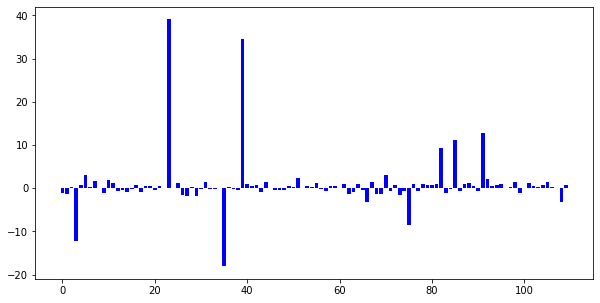

In [36]:
print('Gradient vector')
print('Grad norm: {}'.format(pseudo_grad_norm))
plt.bar(x=list(range(len(pseudo_grad_vec))), height=pseudo_grad_vec, color='blue', label='original')
plt.show()
plt.close()

Clipped Gradient vector


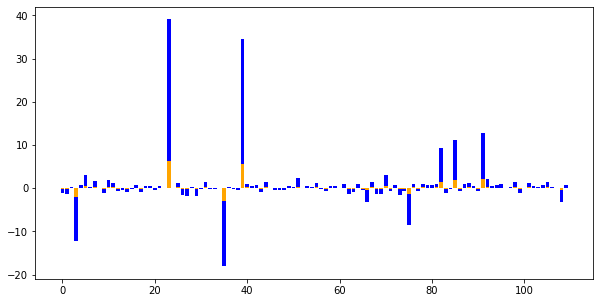

In [37]:
print('Clipped Gradient vector')
plt.bar(x=list(range(len(pseudo_grad_vec))), height=pseudo_grad_vec, color='blue', label='original')
plt.bar(x=list(range(len(pseudo_grad_vec_clipped))), height=pseudo_grad_vec_clipped, color='orange', label='clipped')
plt.show()
plt.close()

Generated random noise


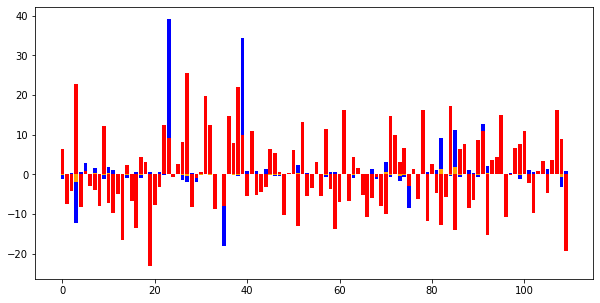

In [38]:
print('Generated random noise')
plt.bar(x=list(range(len(pseudo_grad_vec))), height=pseudo_grad_vec, color='blue', label='original')
plt.bar(x=list(range(len(pseudo_grad_vec_clipped))), height=pseudo_grad_vec_clipped, color='orange', label='clipped')
plt.bar(x=list(range(len(generated_noise))), height=generated_noise, color='red', label='noise')
plt.show()
plt.close()

#### if prune

In [42]:
prune_threshold = np.quantile(np.abs(pseudo_grad_vec), q=0.5)
pseudo_grad_vec_pruned = [0 if np.abs(i) < prune_threshold else i for i in pseudo_grad_vec]
new_pseudo_grad_norm = np.sqrt(np.sum(np.square(pseudo_grad_vec_pruned)))

In [43]:
new_pseudo_grad_vec_clipped = pseudo_grad_vec_pruned / max(1, (new_pseudo_grad_norm/pseudo_clip))
new_generated_noise = np.random.normal(0, pseudo_noise_multiplier * pseudo_clip, len(new_pseudo_grad_vec_clipped))
new_pseudo_grad_vec_clipped_noised = np.add(new_pseudo_grad_vec_clipped, new_generated_noise)

Generated random noise with smaller grad_norm
Prune threshold: 0.7577590704785968, New grad norm: 61.209778769171066
Pruned Gradient vector


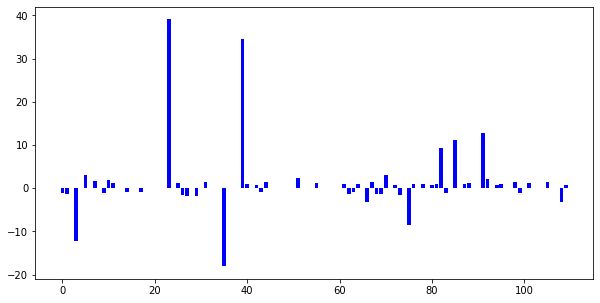

In [44]:
print('Generated random noise with smaller grad_norm')
print('Prune threshold: {}, New grad norm: {}'.format(prune_threshold, new_pseudo_grad_norm))

print('Pruned Gradient vector')
plt.bar(x=list(range(len(pseudo_grad_vec_pruned))), height=pseudo_grad_vec_pruned, color='blue', label='pruned')
plt.show()
plt.close()

Clipped Pruned Gradient vector


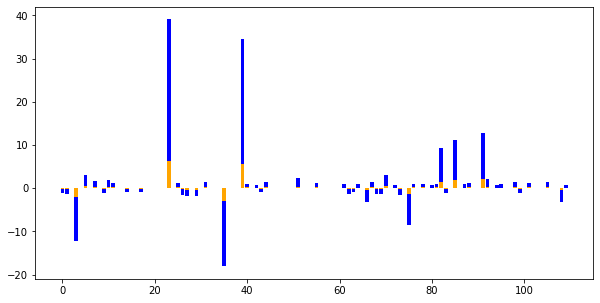

In [46]:
print('Clipped Pruned Gradient vector')
plt.bar(x=list(range(len(pseudo_grad_vec_pruned))), height=pseudo_grad_vec_pruned, color='blue', label='pruned')
plt.bar(x=list(range(len(new_pseudo_grad_vec_clipped))), height=new_pseudo_grad_vec_clipped, color='orange', label='pruned_clipped')
plt.show()
plt.close()

New Generated random noise


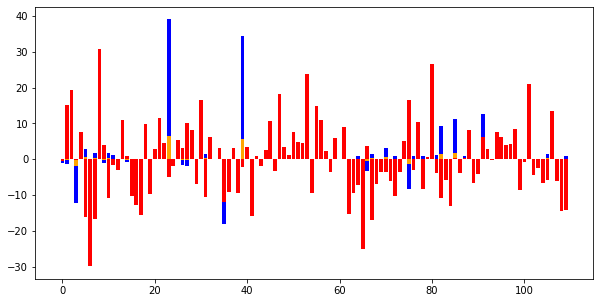

In [47]:
print('New Generated random noise')
plt.bar(x=list(range(len(pseudo_grad_vec_pruned))), height=pseudo_grad_vec_pruned, color='blue', label='pruned')
plt.bar(x=list(range(len(new_pseudo_grad_vec_clipped))), height=new_pseudo_grad_vec_clipped, color='orange', label='pruned_clipped')
plt.bar(x=list(range(len(new_generated_noise))), height=new_generated_noise, color='red', label='noise')
plt.show()
plt.close()

#### if prune + rescale c